Importing the Dependencies

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#warnings
import warnings
warnings.filterwarnings('ignore')

#Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('/content/insurance.csv')

In [4]:
# first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
df.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [7]:
# checking for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
#check the duplicated
df.duplicated().sum()

0

In [9]:
#drop the duplicated column
df.drop_duplicates(inplace=True)

#Data Analysis:-

In [11]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


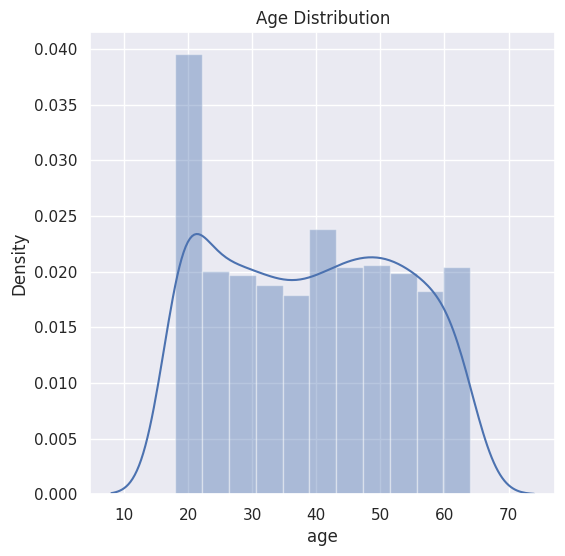

In [14]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

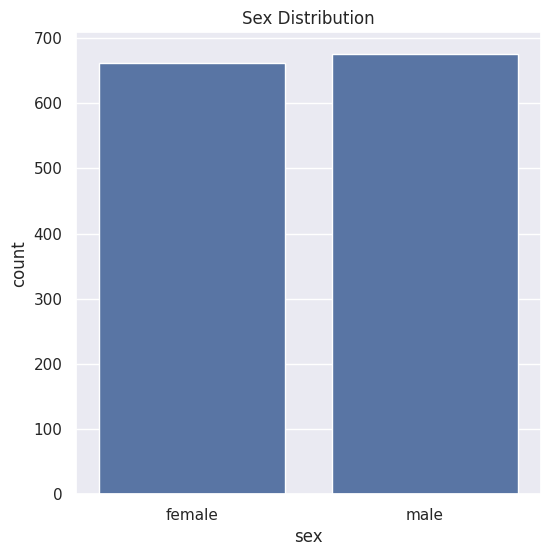

In [15]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [16]:
df['sex'].value_counts()

,count
sex,
male,675
female,662


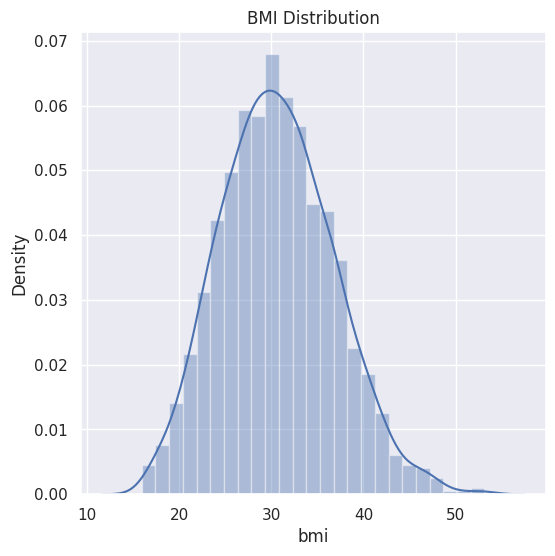

In [17]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

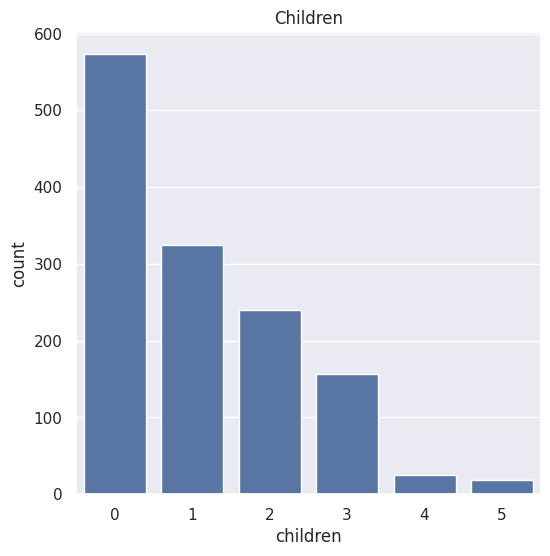

In [18]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [19]:
df['children'].value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


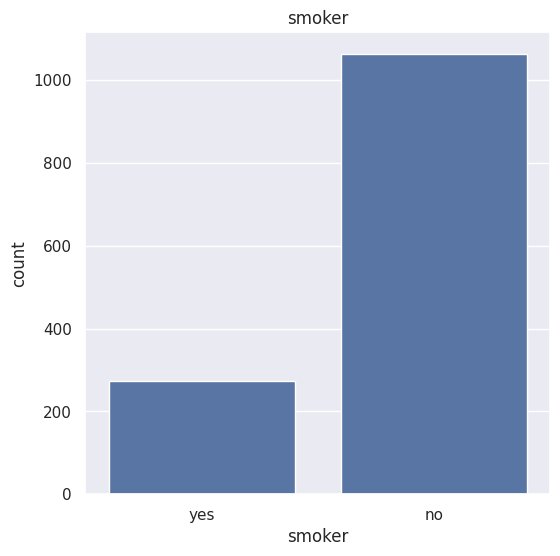

In [20]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

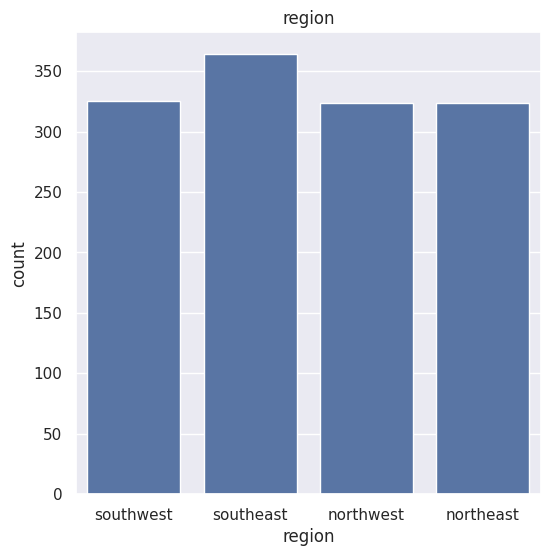

In [21]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [22]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


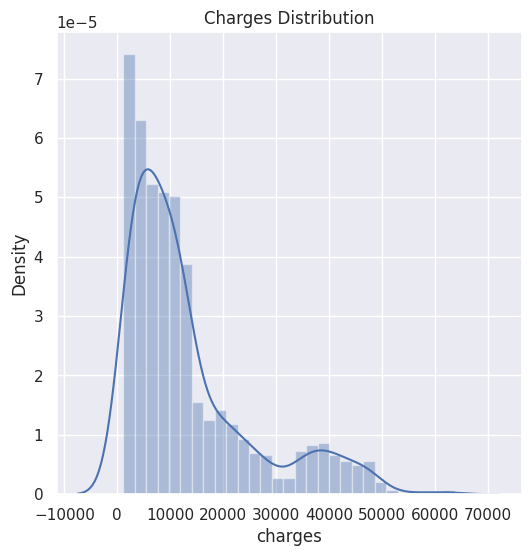

In [23]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

#Data Pre-Processing

Encoding the categorical features

In [24]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

#Splitting the Features and Target

In [25]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1337 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


#Splitting the data into Training data & Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


#Model Training:-

Linear Regression

In [30]:
# loading the Linear Regression model
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Model Evaluation

In [32]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [33]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7584123253312958


In [34]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [35]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7150366419551837


#save the model

In [37]:
import pickle
with open('insurance_model.pkl','wb') as f:
  pickle.dump(regressor,f)
  print('model saved')

model saved


#Building a Predictive System

In [36]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3927.55421975]
The insurance cost is USD  3927.5542197480354
